## 평가 지표

### 1. 분류 모델
- 오차행렬(confusion matrix) : 이진 분류 평가를 나타낼 때 가장 많이 사용되는 평가 지표 매트릭스
    - 정확도(accuracy) 
        - TP + TN / TP + TN + FP + FN 
    - 정밀도(precision) 
        - TP / TP + FP 
        - 거짓 양성의 수를 줄이는 것이 목표일 때 사용하는 성능 지표로서 양성 예측도라고도 부름
    - 재현율(recall) 
        - TP / TP + FN
        - 정밀도와 반비례 관계
        - 모든 양성 샘플을 식별하고 거짓 음성을 줄이는 것이 목표일 때 사용하는 성능 지표로서 민감도, 적중률이라고도 부름
    - 조화평균(f1-score) 
        - 2 x {(precision x recall) / (precision + recall)}
        - 정밀도와 재현율을 모두 고려하기 때문에 불균형한 이진 분류 데이터셋에서는 정확도 보다 나은 지표일 수 있음
    - confusion_matrix 
    - classification_report : precision, recall, f1-score를 한 번에 반환
    - sklearn.metrics > accuracy, f1_score
- ROC 곡선(Receiver Operating Characteristic curve)
    - AUC(Area Under the Curve)
        - 곡선 아래 면적으로 분류 모델의 정확성을 판단하는 지표
        - FP 비율과 TP 비율에 대한 곡선

In [1]:
# 라이브러리 불러오기
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [14]:
# 분류 모델 결과 확인 예제
y_true = ['a','a','b','c']
y_pred = ['a','b','b','c']
label = ['a','b','c']

In [15]:
confusion_matrix(y_true, y_pred)

array([[1, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [17]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           a       1.00      0.50      0.67         2
           b       0.50      1.00      0.67         1
           c       1.00      1.00      1.00         1

   micro avg       0.75      0.75      0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



In [19]:
y_true = [1,1,1,0,1]
y_pred = [1,0,0,0,1]

In [20]:
f1_score(y_true, y_pred)

0.6666666666666666

In [22]:
# iris 데이터셋
import seaborn as sns

iris = sns.load_dataset('iris')

In [23]:
# 라이브러리 불러오기
# LogisticRegression
# DecisionTreeClassifier
# RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# x값 : 입력변수 4개
iris_x = iris.iloc[:, :4].copy()
iris_y = iris['species'].copy()

In [27]:
iris_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [30]:
# y값에 대해서 이항분류로 변경
# True(virginica) False(others)
iris_y = iris['species'] == 'virginica'

In [31]:
# 각 모델별로 auc 값을 산출하고 시각화
from sklearn.metrics import roc_curve, auc

In [ ]:
# fpr, tpr, _ = roc_curve(실제값, 예측값)
# auc(fpr, tpr)

In [32]:
# 학습, 평가 데이터 분리( 8:2 )
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=.2)

In [ ]:
# 실습 과정
# 로지스틱 객체 생성 -> 라이브러리 불러온 후 객체 생성
# 모델 학습
# 예측

In [33]:
log = LogisticRegression()

In [34]:
log.fit(train_x, train_y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
pred_y = log.predict(test_x)

In [36]:
pred_y

array([False,  True, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False])

In [45]:
test_y

32     False
108     True
1      False
58     False
23     False
53     False
38     False
94     False
88     False
143     True
130     True
20     False
141     True
35     False
10     False
111     True
28     False
44     False
33     False
127     True
18     False
43     False
50     False
72     False
137     True
79     False
126     True
82     False
73     False
65     False
Name: species, dtype: bool

In [37]:
fpr, tpr, _ = roc_curve(test_y, pred_y)

In [46]:
fpr

array([0.        , 0.04545455, 1.        ])

In [44]:
tpr

array([0., 1., 1.])

In [38]:
log_auc = auc(fpr, tpr)
log_auc

0.9772727272727273

In [ ]:
# roc_curve 시각화
# x축 : fpr
# y축 : tpr

In [39]:
class_map = {'Logistic':('-', LogisticRegression()),
             'Decision':('--', DecisionTreeClassifier()),
             'Random':(':', RandomForestClassifier())}

In [58]:
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


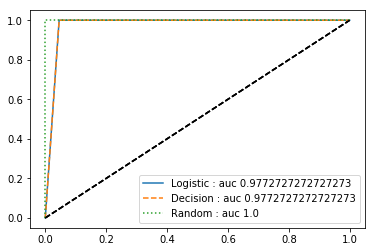

In [60]:
result = {}
for label,(line_fmt,model) in class_map.items():
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    fpr, tpr, _ = roc_curve(test_y, pred_y)
    auc_score = auc(fpr, tpr)
    result[label] = auc_score
    txt = '{} : auc {}'.format(label, auc_score)
    plt.plot(fpr, tpr, line_fmt, label=txt)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.legend()

In [61]:
result

{'Logistic': 0.9772727272727273, 'Decision': 0.9772727272727273, 'Random': 1.0}

In [ ]:
# 결과
# 무작위로 선택한 True 값이 무작위로 선택한 False 값보다 높은 예측 결과를 가질 확률
# auc : 1에 가까울 수록 성능이 좋은 모델
# 0.5보다 작으면 성능이 매우 떨어지는 모델

### 예측모델 평가지표
- RMSE(Root Mean Squared Error)
    - MSE 값의 제곱근 연산 결과
    - 숫자의 크기(단위)에 영향을 크게 받음
        - MSE(Mean Squared Error)
            - 오차제곱합을 자유도로 나눈 값
            - 0에 가까운 작은 값일 수록 모델의 적합도가 높음
            - mean_squared_error(y_test, y_pred)    

- r2_score(y_test, y_pred)
    - 회귀 모델의 결정계수(R squared value)
    - 1에 가까운 값일 수록 생성된 회귀모형이 데이터를 잘 설명하고 있다.

In [62]:
# 라이브러리 불러오기
# MSE
from sklearn.metrics import mean_squared_error
# mean_squared_error(실제값, 예측값)

In [ ]:
# RMSE
# np.sqrt
# **(1/2)
# from math import sqrt

In [63]:
# 앞서 실행한 다중회귀분석에서 생성한 샘플 데이터와 동일하게 적용
# 절편 -5, 오차 10, 독립변수 2개
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, bias=-5, noise=10)

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [64]:
# 선형 회귀 모델 생성 => LinearRegression()
# 샘플 데이터를 학습 및 평가 데이터로 8 대 2 비율 분리
# 학습 데이터로 모델 학습
# 평가 데이터로 모델 예측 수행
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.2)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
reg1 = LinearRegression()

reg1.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# 예측값 생성
pred_y = reg1.predict(test_x)

In [68]:
reg1.score(train_x, train_y)

0.991663278476587

In [71]:
import numpy as np

In [72]:
np.sqrt(mean_squared_error(test_y, pred_y))

11.025257049126834

In [ ]:
# 성능지표 확인
# RMSE : 실제값, 예측값
# r2_score(실제값, 예측값)
# model.score

In [78]:
reg1.score(train_x, train_y)

0.991663278476587

In [74]:
from sklearn.metrics import r2_score

In [79]:
train_pred = reg1.predict(train_x)

In [80]:
r2_score(train_y, train_pred)

0.991663278476587